<a href="https://www.kaggle.com/code/martynasdiugas/sales?scriptVersionId=282182676" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sales Data Analysis — Business Insights Project

**Author:** Martynas Džiugas  
**Goal:** Explore a global sample sales dataset to uncover revenue trends and provide data-driven business recommendations.

---

### Key Business Questions

- Which product lines generate the most revenue?
- How do sales vary by deal size (Small, Medium, Large)?
- What seasonal sales patterns exist?
- Which countries drive the strongest performance?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load dataset
df = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding='latin1')

BASE_COLOR = '#4C72B0' 
CURRENCY_FMT = mtick.StrMethodFormatter('{x:,.0f}')

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Data Quality & Structure Check

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


We see 25 columns with 2,823 total orders. Some fields contain missing values (AddressLine2, State, etc.), but key sales fields are complete — so we can continue analysis without major cleaning.


In [3]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


Sales per order ranges from `~$482` to `~$14,083`, with a mean of `~$3,554`.  
QuantityOrdered averages `~35 units` per order.  
These values confirm no obvious outliers preventing analysis.

In [4]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

No missing values in SALES or ORDERDATE — crucial for revenue and time-series analysis.  
Missing address/state/postal code fields won’t affect our business questions, so we keep all rows.


In [5]:
df['PRODUCTLINE'].value_counts()

PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

Classic Cars and Vintage Cars dominate the catalog — together ~56% of all orders.  
Trains are a niche product representing only ~3%.


In [6]:
df['COUNTRY'].value_counts().head(10)

COUNTRY
USA          1004
Spain         342
France        314
Australia     185
UK            144
Italy         113
Finland        92
Norway         85
Singapore      79
Canada         70
Name: count, dtype: int64

USA is by far the largest market (1,084 orders), followed by major European regions.  
Top 10 countries represent a majority of global sales.


In [7]:
df['DEALSIZE'].value_counts()

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

Most orders are Small or Medium deals — Large deals represent ~5% of transactions.

We’ll check later whether they contribute disproportionately to revenue.

The dataset stores order dates as plain text, which prevents us from performing proper time-based analysis.

To enable monthly and seasonal sales trends, we convert the ORDERDATE column into a true datetime format.

In [8]:
print("Before conversion:")
print(df['ORDERDATE'].head())
print(df['ORDERDATE'].dtype)

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

print("\nAfter conversion:")
print(df['ORDERDATE'].head())
print(df['ORDERDATE'].dtype)

Before conversion:
0     2/24/2003 0:00
1      5/7/2003 0:00
2      7/1/2003 0:00
3     8/25/2003 0:00
4    10/10/2003 0:00
Name: ORDERDATE, dtype: object
object

After conversion:
0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: ORDERDATE, dtype: datetime64[ns]
datetime64[ns]


# Seasonal Revenue Patterns (Monthly Trend)

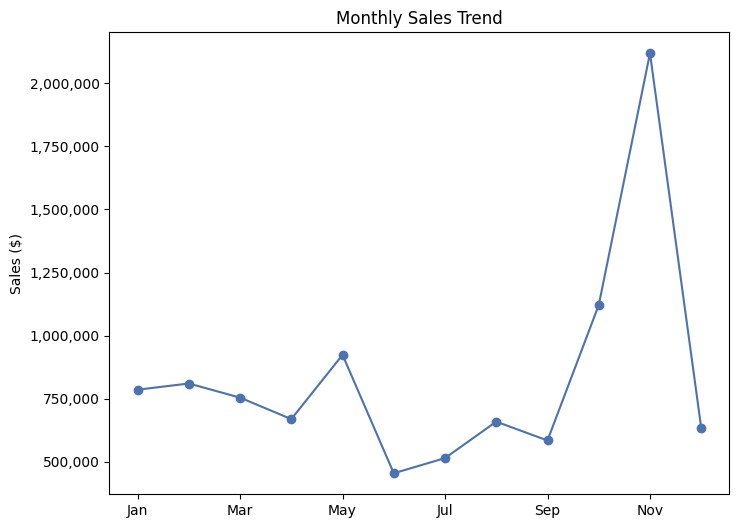

In [9]:
# df['MONTH'] = df['ORDERDATE'].dt.month
# sales_by_month = df.groupby('MONTH')['SALES'].sum()
# sales_by_month.plot(kind='line', marker='o', title='Monthly Sales Trend')
# plt.ylabel('Sales')

# formatter = mtick.StrMethodFormatter('{x:,.0f}')
# plt.gca().yaxis.set_major_formatter(formatter)


df['MONTH'] = df['ORDERDATE'].dt.month 
sales_by_month = df.groupby('MONTH')['SALES'].sum() 
sales_by_month.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
sales_by_month.plot(kind='line', marker='o', figsize=(8, 6), color=BASE_COLOR) 
plt.title('Monthly Sales Trend')
plt.ylabel('Sales ($)') 

plt.gca().yaxis.set_major_formatter(CURRENCY_FMT)

**Insight**
- Clear Q4 sales peak driven by holiday demand
- Mid-year (May–July) is the weakest period
- Strong opportunity to increase revenue via targeted promotions in lower months

# Year-Over-Year Revenue Performance

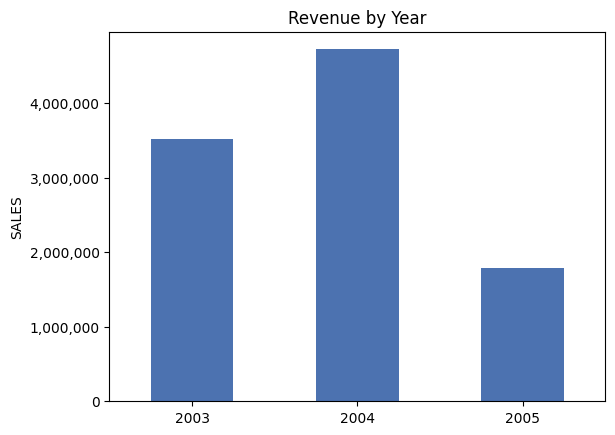

In [10]:
sales_by_year = df.groupby('YEAR_ID')['SALES'].sum()
sales_by_year.plot(kind='bar', color=BASE_COLOR)
plt.title('Revenue by Year')
plt.xlabel('')
plt.ylabel('SALES')

plt.gca().yaxis.set_major_formatter(CURRENCY_FMT) 
plt.xticks(rotation=0);

Sales peaked in 2004, then dropped sharply in 2005.

Q2: Which product lines bring the most revenue?

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Classic Cars'),
  Text(1, 0, 'Vintage Cars'),
  Text(2, 0, 'Motorcycles'),
  Text(3, 0, 'Trucks and Buses'),
  Text(4, 0, 'Planes'),
  Text(5, 0, 'Ships'),
  Text(6, 0, 'Trains')])

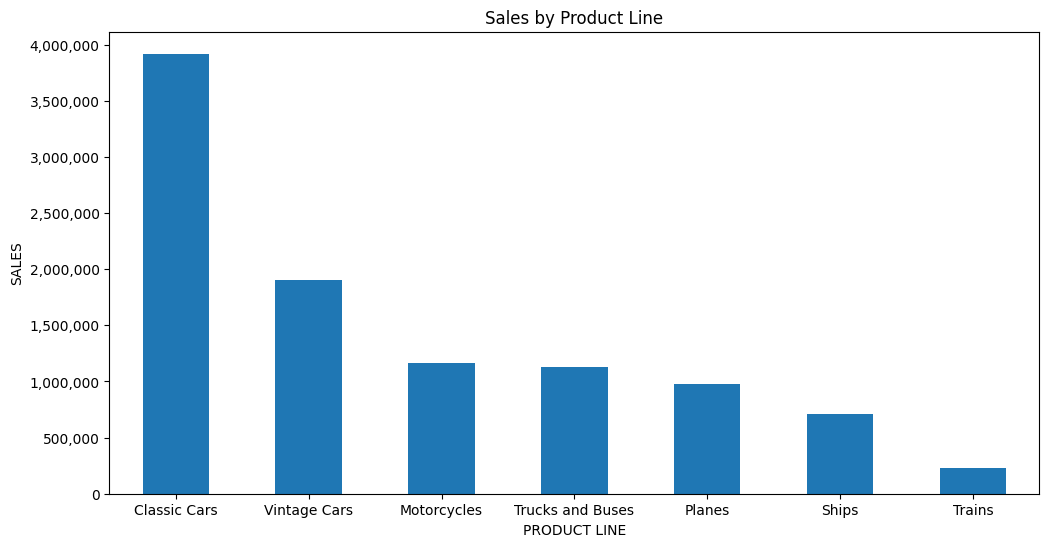

In [11]:
sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
sales_by_productline.plot(kind='bar', figsize=(12, 6), title='Sales by Product Line')
plt.xlabel('PRODUCT LINE')
plt.ylabel('SALES')
formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=0)

Classic Cars and Vintage Cars generate most revenue.

Q3: Which countries are most valuable?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'UK'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Finland'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'Denmark')])

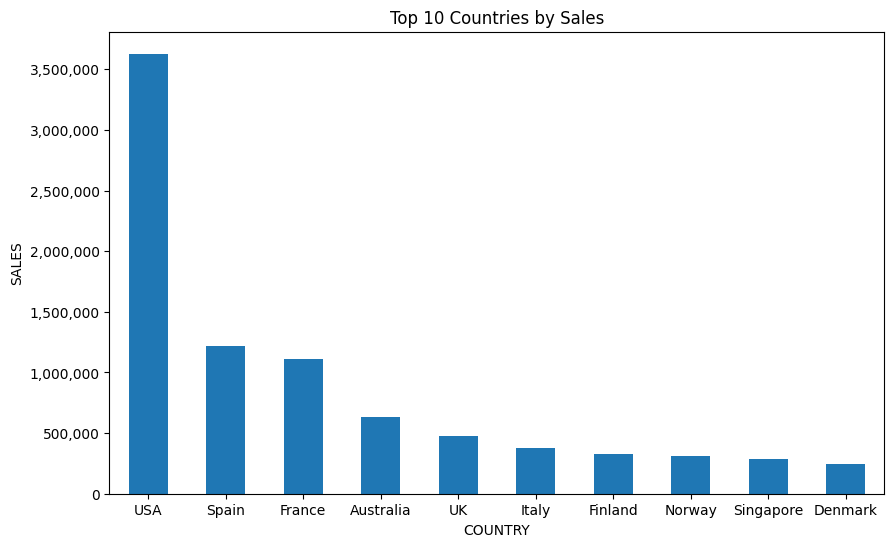

In [12]:
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
sales_by_country.plot(kind='bar', figsize=(10, 6), title='Top 10 Countries by Sales')
plt.ylabel('SALES')
formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=0)

The US, Spain and France account for most sales.

Q4: Does deal size matter?

(array([0, 1, 2]),
 [Text(0, 0, 'Small'), Text(1, 0, 'Medium'), Text(2, 0, 'Large')])

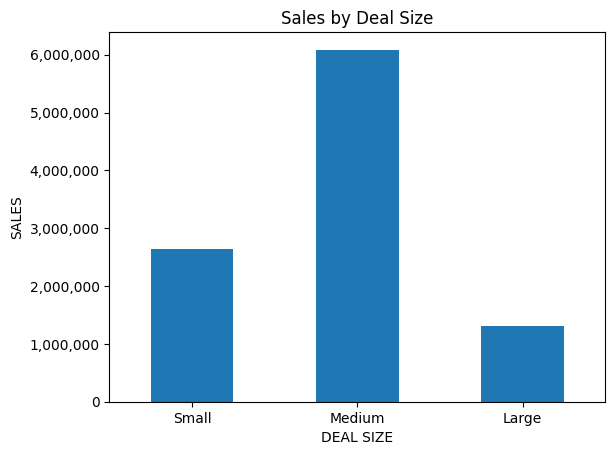

In [13]:
# Make DEALSIZE an ordered category
df['DEALSIZE'] = pd.Categorical(df['DEALSIZE'], 
                                categories=['Small', 'Medium', 'Large'],
                                ordered=True)

sales_by_dealsize = df.groupby('DEALSIZE', observed=True)['SALES'].sum()
sales_by_dealsize = sales_by_dealsize.loc[['Small', 'Medium', 'Large']]  # enforce order

sales_by_dealsize.plot(kind='bar', title='Sales by Deal Size')
plt.xlabel('DEAL SIZE')
plt.ylabel('SALES')

formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=0)

Medium deal sizes contribute the most sales overall.

Sales seasonality (monthly trends)

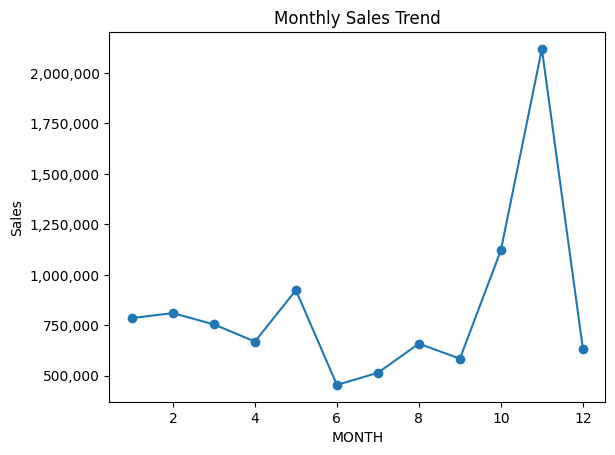

In [14]:
df['MONTH'] = df['ORDERDATE'].dt.month
sales_by_month = df.groupby('MONTH')['SALES'].sum()
sales_by_month.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel('Sales')

formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Classic Cars'),
  Text(1, 0, 'Motorcycles'),
  Text(2, 0, 'Planes'),
  Text(3, 0, 'Ships'),
  Text(4, 0, 'Trains'),
  Text(5, 0, 'Trucks and Buses'),
  Text(6, 0, 'Vintage Cars')])

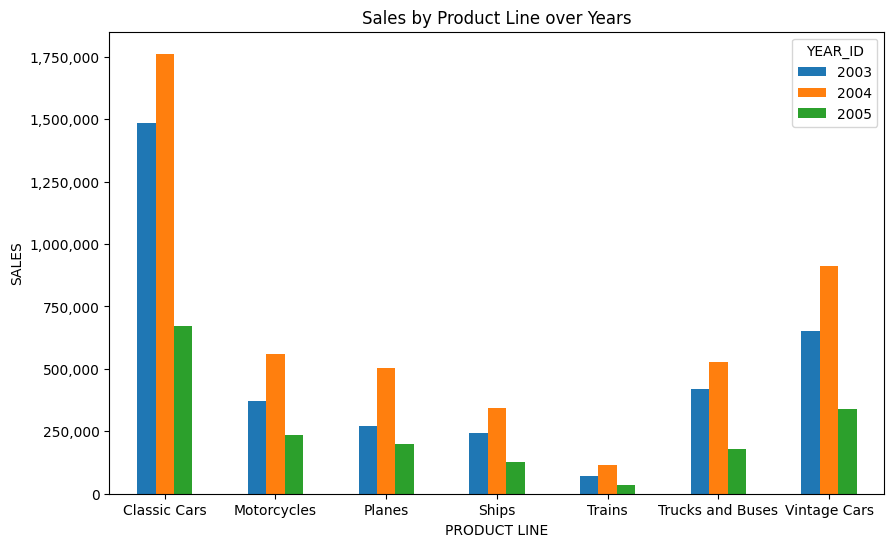

In [15]:
sales_product_year = df.groupby(['PRODUCTLINE','YEAR_ID'])['SALES'].sum().unstack()
sales_product_year.plot(kind='bar', figsize=(10, 6), title='Sales by Product Line over Years')
plt.xlabel('PRODUCT LINE')
plt.ylabel('SALES')

#display sales in normal numbers, with commas
formatter = mtick.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=0)